In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Question_Pairs_new/Question_Pairs_BiLSTM

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Question_Pairs_new/Question_Pairs_BiLSTM


In [2]:
# import dependencies
import pandas as pd
import seaborn as sns
import numpy as np

### **EDA**

In [3]:
df = pd.read_csv('dataset/train.csv')

In [4]:
df = df.iloc[:,3:]

In [5]:
df.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.tail()

,question1,question2,is_duplicate
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,What is one coin?,What's this coin?,0
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [7]:
print(f'Null data: \n{df.isnull().sum()}\n')
print('Which index is null: \n{}'.format(np.where(df.isnull())))

Null data: 
question1       1
question2       2
is_duplicate    0
dtype: int64

Which index is null: 
(array([105780, 201841, 363362]), array([1, 1, 0]))


In [8]:
df = df.dropna()
df.reset_index(inplace=True, drop=True)

In [9]:
print(f'Null data: \n{df.isnull().sum()}\n')
print('Which index is null: \n{}'.format(np.where(df.isnull())))

Null data: 
question1       0
question2       0
is_duplicate    0
dtype: int64

Which index is null: 
(array([], dtype=int64), array([], dtype=int64))


In [10]:
print(f'Total data: \n{len(df)}\n')

Total data: 
404287



In [11]:
print(f'Total positive data (1): \n{df.is_duplicate.value_counts()[1]}\n')
print(f'Total negative data (0): \n{df.is_duplicate.value_counts()[0]}\n')

Total positive data (1): 
149263

Total negative data (0): 
255024



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Dataset distribution')

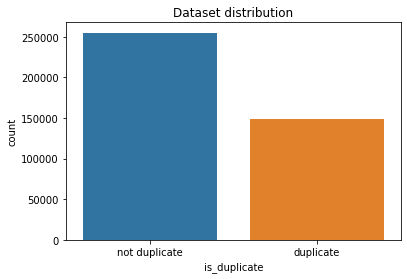

In [12]:
ax = sns.countplot(df.is_duplicate)
ax.set_xticklabels(['not duplicate', 'duplicate'], fontsize=10)
ax.set_title('Dataset distribution')

In [13]:
print(f'The negative data is {df.is_duplicate.value_counts()[0]/len(df)*100}% of the entire dataset')
print(f'The positive data is {df.is_duplicate.value_counts()[1]/len(df)*100}% of the entire dataset')

The negative data is 63.0799407351708% of the entire dataset
The positive data is 36.92005926482919% of the entire dataset


In [14]:
for i in df[df["is_duplicate"] == 0].index[:5]:
  print(df.question1[i], '|', df.question2[i], '|', df.is_duplicate[i])
  print('===============')

What is the step by step guide to invest in share market in india? | What is the step by step guide to invest in share market? | 0
What is the story of Kohinoor (Koh-i-Noor) Diamond? | What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back? | 0
How can I increase the speed of my internet connection while using a VPN? | How can Internet speed be increased by hacking through DNS? | 0
Why am I mentally very lonely? How can I solve it? | Find the remainder when [math]23^{24}[/math] is divided by 24,23? | 0
Which one dissolve in water quikly sugar, salt, methane and carbon di oxide? | Which fish would survive in salt water? | 0


In [15]:
for i in df[df["is_duplicate"] == 1].index[:5]:
  print(df.question1[i], '|', df.question2[i], '|', df.is_duplicate[i])
  print('===============')

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me? | I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me? | 1
How can I be a good geologist? | What should I do to be a great geologist? | 1
How do I read and find my YouTube comments? | How can I see all my Youtube comments? | 1
What can make Physics easy to learn? | How can you make physics easy to learn? | 1
What was your first sexual experience like? | What was your first sexual experience? | 1


In [16]:
# df.question1.str.len().describe()
# df.question2.str.len().describe()